In [464]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

## Task 1

In [465]:
df = pd.read_csv('Mall_Customers.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [466]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [467]:
df.drop('CustomerID', axis=1, inplace=True)

In [468]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

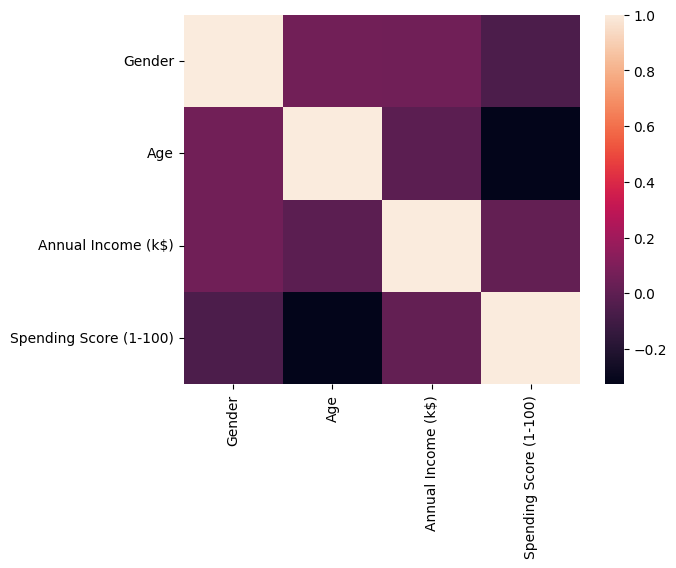

In [469]:
sns.heatmap(df.select_dtypes(include="number").corr())
plt.show()

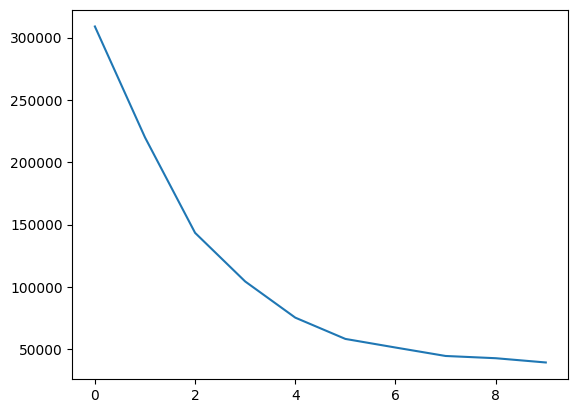

In [470]:
wcss = []
for i in range(1, 11):
  model = KMeans(i, init='k-means++', random_state=727)
  model.fit(df)
  wcss.append(model.inertia_)

sns.lineplot(wcss)
plt.show()

In [471]:
def kmeans(data: np.ndarray | pd.DataFrame, k: int = 5, rs: int = 727):
  model = KMeans(k, init='k-means++', random_state=rs)
  return model.fit_predict(data)

df_ohne_age = df.drop('Age', axis=1)

ss = StandardScaler()
df_scaled = ss.fit_transform(df_ohne_age)

predictions_normal = kmeans(df_ohne_age)
predictions_scaled = kmeans(df_scaled)

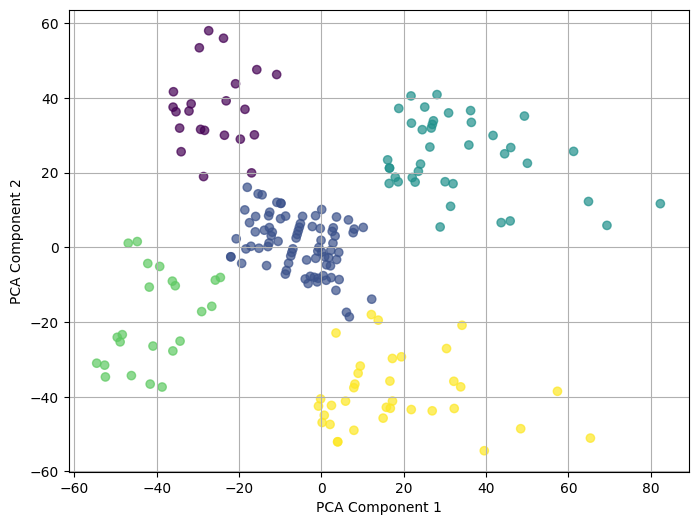

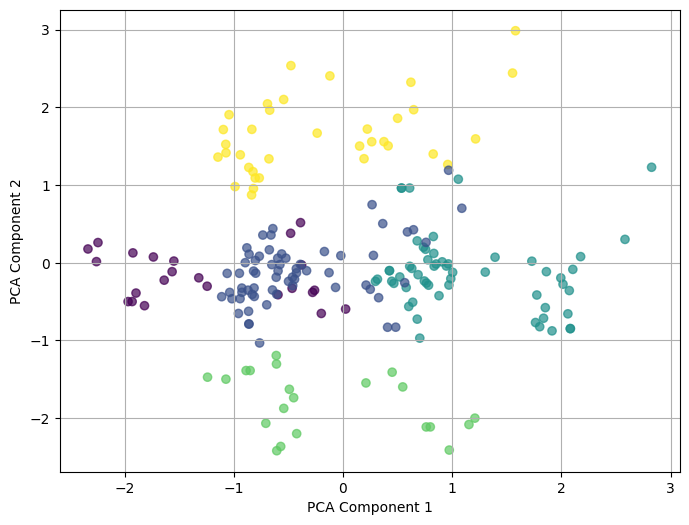

0.5534496268497305
0.38523772352316


In [472]:
def plot_pca(data: np.ndarray | pd.DataFrame, predictions: np.ndarray):
  pca = PCA(n_components=2)
  data_2d = pca.fit_transform(data)

  plt.figure(figsize=(8, 6))
  plt.scatter(data_2d[:, 0], data_2d[:, 1], c=predictions, cmap='viridis', alpha=0.7)
  plt.xlabel("PCA Component 1")
  plt.ylabel("PCA Component 2")
  plt.grid(True)
  plt.show()

plot_pca(df_ohne_age, predictions_normal)
plot_pca(df_scaled, predictions_scaled)

print(silhouette_score(df_ohne_age, predictions_normal))
print(silhouette_score(df_scaled, predictions_scaled))

The predictions with normal dataset without scaling appear to be more cluster-like than when scaling was performed
<br>I kind of expected scaling to draw better results but this does the opposite
<br>Also as noted from the silhouette scores, the normal clusters clearly come above the scaled ones

## Task 2

In [473]:
df = pd.DataFrame({
  'vehicle_serial_no': [5, 3, 8, 2, 4, 7, 6, 10, 1, 9],
  'mileage': [150000, 120000, 250000, 80000, 100000, 220000, 180000, 300000, 75000, 280000],
  'fuel_efficiency': [15, 18, 10, 22, 20, 12, 16, 8, 24, 9],
  'maintenance_cost': [5000, 4000, 7000, 2000, 3000, 6500, 5500, 8000, 1500, 7500],
  'vehicle_type': ['SUV', 'Sedan', 'Truck', 'Hatchback', 'Sedan', 'Truck', 'SUV', 'Truck', 'Hatchback', 'SUV']
})

In [474]:
df_ohne_vt = df.drop('vehicle_type', axis=1)

ss = StandardScaler()
df_scaled = ss.fit_transform(df_ohne_vt.copy())

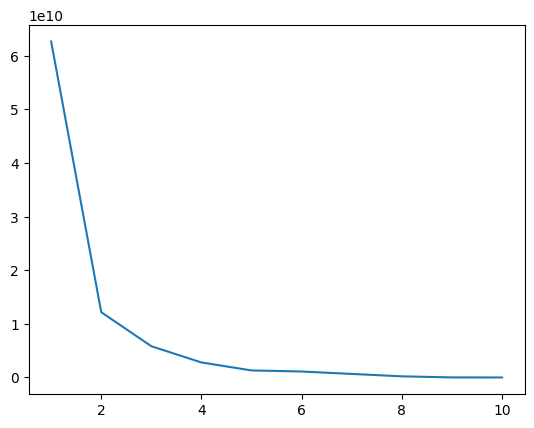

In [475]:
wcss = []
random_state = 727

for i in range(1, 11):
  model = KMeans(i, init='k-means++', random_state=random_state)
  model.fit(df_ohne_vt)
  wcss.append(model.inertia_)

sns.lineplot(x=range(1, 11), y=wcss)
plt.show()

In [476]:
predictions_normal = kmeans(df_ohne_vt, k=4, rs=random_state)
predictions_scaled = kmeans(df_scaled, k=4, rs=random_state)

In [477]:
print(silhouette_score(df_ohne_vt, predictions_normal))
print(silhouette_score(df_scaled, predictions_scaled))

0.4738887642684584
0.5085133756383747


Scaling here ended up giving better results based on the silhouette scores

## Task 3

In [478]:
random_state = 727

np.random.seed(random_state)

cap = np.vectorize(lambda v: min(4, max(0, v)))
N = 727 + 1
S, M, L = np.floor([N * 0.2, N * 0.3, N * 0.5]).astype(int)

data = {
  'student_id': range(1, S + M + L + 1),
  'GPA': cap(np.round(np.concatenate([
    np.random.normal(3.7, 0.2, M),
    np.random.normal(2.8, 0.3, L),
    np.random.normal(1.9, 0.2, S)
  ]), 2)),
  'study_hours': np.concatenate([
    np.random.randint(12, 20, M),
    np.random.randint(6, 12, L),
    np.random.randint(1, 6, S)
  ]),
  'attendance_rate': np.concatenate([
    np.random.randint(90, 100, M),
    np.random.randint(70, 90, L),
    np.random.randint(40, 70, S)
  ])
}

df = pd.DataFrame(data)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   student_id       727 non-null    int64  
 1   GPA              727 non-null    float64
 2   study_hours      727 non-null    int32  
 3   attendance_rate  727 non-null    int32  
dtypes: float64(1), int32(2), int64(1)
memory usage: 17.2 KB


,student_id,GPA,study_hours,attendance_rate
0,1,3.87,13,97
1,2,3.63,19,94
2,3,3.28,18,91
3,4,3.70,12,91
4,5,3.56,13,93


In [479]:
df.describe()

,student_id,GPA,study_hours,attendance_rate
count,727.000000,727.000000,727.000000,727.000000
mean,364.000000,2.890963,9.537827,78.905089
std,210.011111,0.670476,4.939679,14.773704
min,1.000000,1.490000,1.000000,40.000000
25%,182.500000,2.490000,6.000000,72.000000
50%,364.000000,2.880000,9.000000,82.000000
75%,545.500000,3.505000,13.000000,91.000000
max,727.000000,4.000000,19.000000,99.000000


In [480]:
df_original = df.copy()
df.drop('student_id', axis=1, inplace=True)

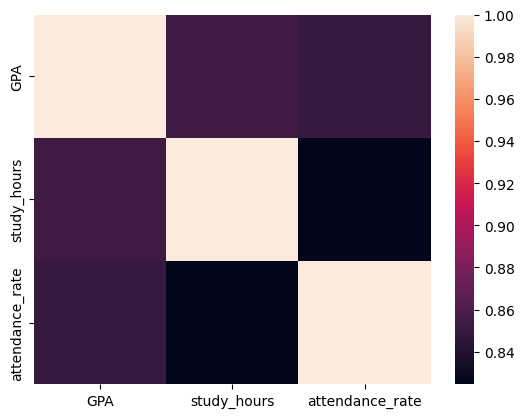

In [481]:
sns.heatmap(df.corr())
plt.show()

In [482]:
ss = StandardScaler()
df_scaled = ss.fit_transform(df)

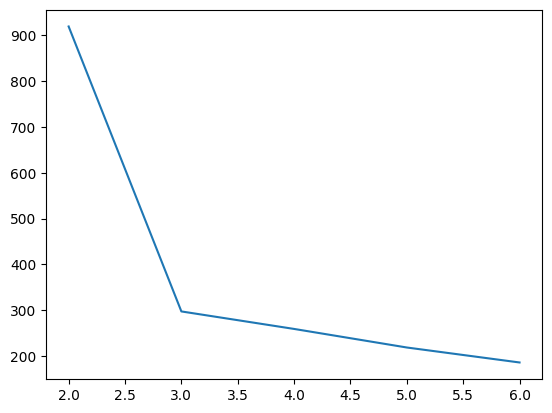

In [483]:
wcss = []
for i in range(2, 7):
  model = KMeans(i, init='k-means++', random_state=random_state)
  model.fit(df_scaled)
  wcss.append(model.inertia_)

sns.lineplot(x=range(2,7), y=wcss)
plt.show()

In [484]:
model = KMeans(3, init='k-means++', random_state=random_state)
predictions = model.fit_predict(df_scaled)

df['clusters'] = predictions

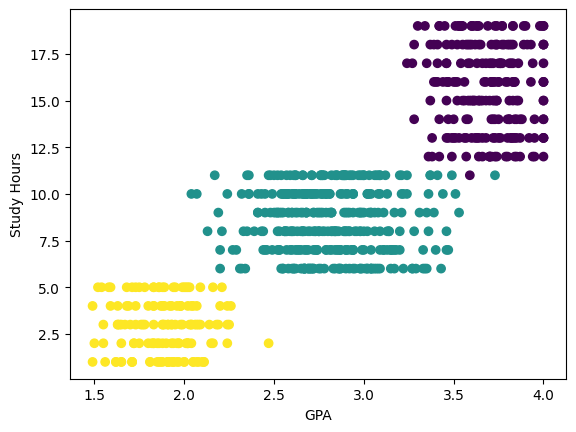

In [485]:
plt.scatter(x=df['GPA'], y=df['study_hours'], c=df['clusters'], cmap='viridis', label=df['clusters'].unique())
plt.xlabel('GPA')
plt.ylabel('Study Hours')
plt.show()

# Scatter plot presented

In [486]:
df_original['clusters'] = df['clusters']

values = df_original.values
np.random.shuffle(values)
pd.DataFrame(data=values, columns=df_original.columns).head(10)

# Dataframe shown

,student_id,GPA,study_hours,attendance_rate,clusters
0,354.0,2.85,8.0,82.0,1.0
1,409.0,2.98,6.0,74.0,1.0
2,310.0,3.47,7.0,84.0,1.0
3,489.0,2.90,11.0,70.0,1.0
4,717.0,2.07,1.0,53.0,2.0
5,1.0,3.87,13.0,97.0,0.0
6,424.0,2.82,11.0,87.0,1.0
7,479.0,2.60,9.0,80.0,1.0
8,240.0,2.75,9.0,85.0,1.0
9,451.0,3.24,11.0,76.0,1.0
